# RQ4 : Which performance stats contribute to determining a team's success the most?

This question aims to analyse various features (based on players,  teams and individual games) that potentially impact a team's performance and identify the top ones which teams should focus on the most to maximise their efficiency during games.

Lets first load all the datasets we need :

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

c:\Users\dusad\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sns.set_context('talk', font_scale=0.9)

In [3]:
player_stats = pd.read_csv('../data/cleaned/players_data/player_stats.csv')
team_stats = pd.read_csv('../data/cleaned/team_regSeason_data/team_regSeason_stats.csv')
team_game_data = pd.read_csv('../data/cleaned/team_game_data/team_game_stats.csv')

In [4]:
player_stats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1985-86,0,22.0,82,1.0,...,0.611,160.0,221.0,381.0,54,49.0,49.0,99.0,229,521
1,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1986-87,0,23.0,79,72.0,...,0.780,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852
2,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1987-88,0,24.0,82,64.0,...,0.773,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937
3,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1988-89,0,25.0,82,82.0,...,0.786,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088
4,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1989-90,0,26.0,82,82.0,...,0.751,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26739,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2008-09,0,34.0,65,65.0,...,0.799,157.0,333.0,490.0,64,28.0,84.0,90.0,183,838
26740,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2009-10,0,35.0,64,6.0,...,0.743,114.0,231.0,345.0,48,14.0,50.0,63.0,183,474
26741,980,Zydrunas Ilgauskas,1610612748,Miami Heat,MIA,2010-11,0,36.0,72,51.0,...,0.783,108.0,179.0,287.0,26,23.0,58.0,52.0,185,360
26742,1629597,Zylan Cheatham,1610612740,New Orleans Pelicans,NOP,2019-20,0,24.0,4,0.0,...,0.000,3.0,6.0,9.0,3,1.0,1.0,4.0,10,12


In [5]:
team_stats

,team_id,team_name,team_city,team_nickname,season,games_played,wins,losses,win_pct,conference_rank,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,personal_fouls,steals,turnovers,blocks,points,points_rank
0,1610612737,Atlanta Hawks,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,...,0,0,0,1330,2057,0,0,0,5313,10
1,1610612737,Atlanta Hawks,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,...,0,0,0,1476,2092,0,0,0,5730,3
2,1610612737,Atlanta Hawks,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,...,0,0,0,1229,1848,0,0,0,4833,10
3,1610612737,Atlanta Hawks,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,...,0,0,0,1427,2120,0,0,0,5389,9
4,1610612737,Atlanta Hawks,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,...,0,0,0,1298,1771,0,0,0,5038,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,1610612764,Washington Wizards,Washington,Wizards,2019-20,72,25,47,0.347,9,...,732,2295,3027,1801,1634,574,1020,309,8238,8
1623,1610612764,Washington Wizards,Washington,Wizards,2020-21,72,34,38,0.472,0,...,697,2557,3254,1835,1555,528,1036,297,8398,3
1624,1610612764,Washington Wizards,Washington,Wizards,2021-22,82,35,47,0.427,12,...,737,2798,3535,2052,1545,522,1077,406,8907,22
1625,1610612764,Washington Wizards,Washington,Wizards,2022-23,82,35,47,0.427,12,...,774,2804,3578,2083,1539,561,1158,424,9279,21


In [6]:
team_game_data

,season_id,team_id,team_abbr,team_name,matchup,opponent_abbr,opponent_name,game_id,game_date,win/loss,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,plus_minus,season
0,22023,1610612737,ATL,Atlanta Hawks,ATL @ WAS,WAS,Washington Wizards,22300445,2023-12-31,W,...,12.0,46.0,58.0,27,5.0,3,12,18,4.0,2023-24
1,22023,1610612737,ATL,Atlanta Hawks,ATL vs. SAC,SAC,Sacaramento Kings,22300431,2023-12-29,L,...,18.0,33.0,51.0,29,9.0,4,15,16,-7.0,2023-24
2,22023,1610612737,ATL,Atlanta Hawks,ATL @ CHI,CHI,Chicago Bulls,22300408,2023-12-26,L,...,12.0,28.0,40.0,24,6.0,3,15,21,-5.0,2023-24
3,22023,1610612737,ATL,Atlanta Hawks,ATL vs. MEM,MEM,Memphis Grizzlies,22300393,2023-12-23,L,...,13.0,28.0,41.0,28,8.0,5,10,22,-6.0,2023-24
4,22023,1610612737,ATL,Atlanta Hawks,ATL @ MIA,MIA,Miami Heat,22300384,2023-12-22,L,...,12.0,31.0,43.0,29,9.0,2,13,23,-9.0,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27345,21996,1610612764,WAS,Washington Wizards,WAS @ IND,IND,Indiana Pacers,29600065,1996-11-09,L,...,12.0,30.0,42.0,23,10.0,6,15,30,-3.0,1996-97
27346,21996,1610612764,WAS,Washington Wizards,WAS vs. CHH,CHH,Charlotte Hornets,29600054,1996-11-08,L,...,25.0,30.0,55.0,22,5.0,3,7,21,-15.0,1996-97
27347,21996,1610612764,WAS,Washington Wizards,WAS vs. SAS,SAS,San Antonio Spurs,29600042,1996-11-06,W,...,14.0,38.0,52.0,19,3.0,3,14,18,10.0,1996-97
27348,21996,1610612764,WAS,Washington Wizards,WAS vs. CLE,CLE,Cleveland Cavaliers,29600015,1996-11-02,L,...,13.0,31.0,44.0,19,4.0,8,15,24,-2.0,1996-97


In [7]:
print("player dataset has data on", len(player_stats['season'].unique()), "seasons")
print("team dataset has data on", len(team_stats['season'].unique()), "seasons")
print("team_game dataset has data on", len(team_game_data['season'].unique()), "seasons")

player dataset has data on 78 seasons
team dataset has data on 78 seasons
team_game dataset has data on 27 seasons


Since we only have game data on the past 27 seasons, we will analyse data from other datasets in the same time frame as well to maintain consistency

In [8]:
player_stats = player_stats[player_stats['season'] >= '1996-97']
team_stats = team_stats[team_stats['season'] >= '1996-97']

It is quite obvious that for a team to perform well, individual player stats are absolutely crucial such as `3pt%`, `field goal%`, `blocks` etc. However, it would be interesting to see if teams are relying on 1 or 2 players to do well or are all players in the team performing equally well, leading to the team's success. 

To do this we will look at the top 3 teams with the highest points per game (PPG) in the last 5 years and see how players contributed to their respective teams :

In [9]:
team_stats = team_stats.copy()
team_stats['PPG'] = team_stats['points'] / team_stats['games_played']

# Identify the top 3 teams with the highest PPG for each season over the past 5 years
top_teams_by_season = {}
current_season = '2023-24'  
past_seasons = [f"{int(current_season[:4]) - i}-{int(current_season[-2:]) - i}" for i in range(1, 6)]

for season in past_seasons:
    top_teams_by_season[season] = team_stats[team_stats['season'] == season].nlargest(3, 'PPG')

player_contribution_df = pd.DataFrame(columns=['player_name', 'season', 'team_name', 'team_ppg', 'player_ppg', 'player_contribution'])

# Iterate through top teams for each season and calculate player contributions
for season, top_teams_df in top_teams_by_season.items():
    for index, team_row in top_teams_df.iterrows():
        team_id = team_row['team_id']
        team_name = team_row['team_name']
        team_ppg = team_row['PPG']
        
        team_players = player_stats[(player_stats['season'] == season) & (player_stats['team_id'] == team_id)]
        
        for index, player_row in team_players.iterrows():
            player_name = player_row['player_name']
            player_ppg = player_row['points'] / player_row['games_played']
            player_contribution = player_ppg / team_ppg
            
            player_contribution_df = player_contribution_df.append({
                'player_name': player_name,
                'season': season,
                'team_name': team_name,
                'team_ppg': team_ppg,
                'player_ppg': player_ppg,
                'player_contribution': player_contribution
            }, ignore_index=True)

In [10]:
group_df = player_contribution_df.groupby(['season', 'team_name'])
sorted_df = group_df.apply(lambda x: x.sort_values(['player_contribution'], ascending=False))
sorted_df = sorted_df.reset_index(drop=True)
sorted_df

,player_name,season,team_name,team_ppg,player_ppg,player_contribution
0,Stephen Curry,2018-19,Golden State Warriors,117.682927,27.260870,0.231647
1,Kevin Durant,2018-19,Golden State Warriors,117.682927,25.987179,0.220824
2,Klay Thompson,2018-19,Golden State Warriors,117.682927,21.538462,0.183021
3,DeMarcus Cousins,2018-19,Golden State Warriors,117.682927,16.266667,0.138225
4,Draymond Green,2018-19,Golden State Warriors,117.682927,7.363636,0.062572
...,...,...,...,...,...,...
311,Matthew Dellavedova,2022-23,Sacramento Kings,120.707317,1.468750,0.012168
312,PJ Dozier,2022-23,Sacramento Kings,120.707317,1.375000,0.011391
313,KZ Okpala,2022-23,Sacramento Kings,120.707317,1.314286,0.010888
314,Chima Moneke,2022-23,Sacramento Kings,120.707317,1.000000,0.008285


In [11]:
len(sorted_df[sorted_df['player_contribution'] >= 0.2])

19

Above is a table on how each player in each team performed (in terms of contributing to team points) in the past 5 seasons. As we can see only a small proportion of players (19/316) have a `player_contribution` of over 20% so the question arises is it really the case that teams only require a few players to perform well for the team? 

Lets visualise this by looking at how many players on average make up for 50% of the total points scored by their respective team :

In [12]:
results = []

for (team, season), group in sorted_df.groupby(['team_name', 'season']):
    cumulative_contribution = 0
    num_players = 0
    
    for _, row in group.iterrows():
        cumulative_contribution += row['player_contribution']
        num_players += 1

        if cumulative_contribution >= 0.5:
            break

    results.append({
        'team_name': team,
        'season': season,
        'num_players': num_players
    })

results_df = pd.DataFrame(results)
results_df

,team_name,season,num_players
0,Atlanta Hawks,2022-23,3
1,Brooklyn Nets,2020-21,3
2,Dallas Mavericks,2019-20,3
3,Golden State Warriors,2018-19,3
4,Golden State Warriors,2022-23,3
5,Houston Rockets,2019-20,2
6,Memphis Grizzlies,2021-22,3
7,Milwaukee Bucks,2018-19,3
8,Milwaukee Bucks,2019-20,3
9,Milwaukee Bucks,2020-21,3


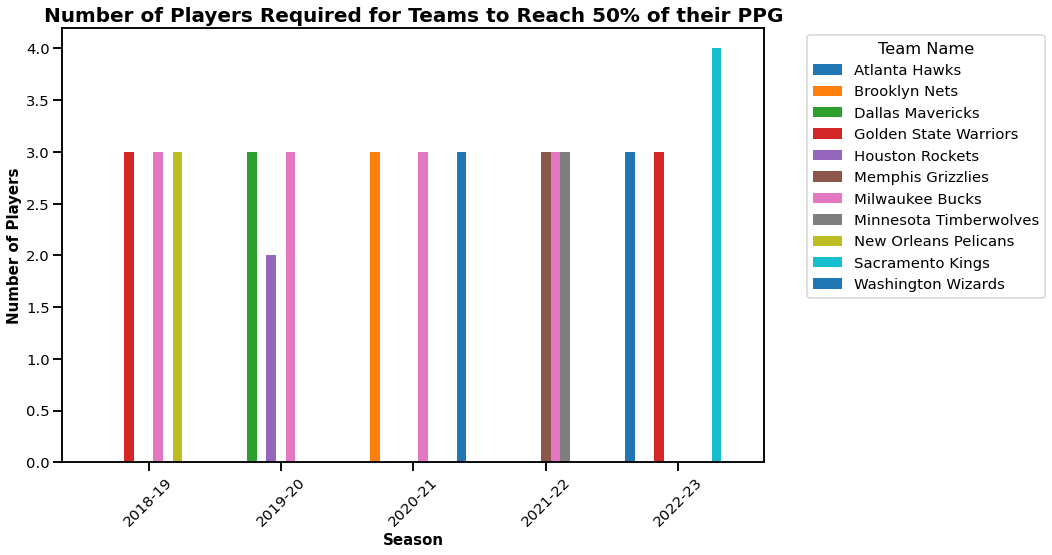

In [13]:
season_team_players = results_df.groupby(['season', 'team_name'])['num_players'].sum().unstack()

fig, ax = plt.subplots(figsize=(15, 8))
season_team_players.plot(kind='bar', stacked=False, ax=ax, width = 0.8)
ax.set_xlabel('Season', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of Players', fontsize=15, fontweight='bold')
ax.set_title('Number of Players Required for Teams to Reach 50% of their PPG', fontsize=20, fontweight='bold')
ax.legend(title='Team Name', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(season_team_players.index, rotation=45)
plt.gca().set_aspect('auto')
plt.tight_layout()
plt.show()

As you can see from the above, in most cases only 3 players (from the entire roster of around 15-18 players) make up for 50% of a team's points (ppg) throughout the season. This suggests that teams heavily rely on a few players to perform well and carry them to victory. There could be multiple reasons as to why this is the case, here are a couple that we think might contribute to this observation :

  - <ins> Star Player </ins> :  In many cases, teams have one or a few star players who are exceptionally talented scorers and play a central role in the team's offense. For e.g. : We can see from `sorted_df` that in the `2018-19` season, `Stephen Curry` and `Klay Thompson` alone contributed to over 45% of the points scored by `Golden State Warriors` in that season. These star players often have the skills, athleticism, and experience to consistently generate scoring opportunities and convert them into points.

  - <ins> Specialized Roles </ins>: Certain players are designated to fulfill specialized roles within the team's offensive strategy. While their primary responsibility may not be scoring, they excel in other areas such as playmaking or defensive plays such as rebounding, blocks, steals etc. As a result, a smaller group of players carry the bulk of the scoring load, while others contribute in different ways to support the team's overall success

We will now look at individual team stats and how they impact a team's performance. To do this we will first observe the correlation between different factors such as `field_goal_pct`,`three_point_pct` etc and the `conference_rank` (chosen metric for "team's success") of teams. We will then build a model based on features with the highest correlation scores which will help understand the relationships between different features and how they contribute to a team’s success

Note : NBA teams are divided into 2 conferences Eastern and Western with 15 teams in each conference. Therefore, Conference rank is the rank of a team in their respective conference. 

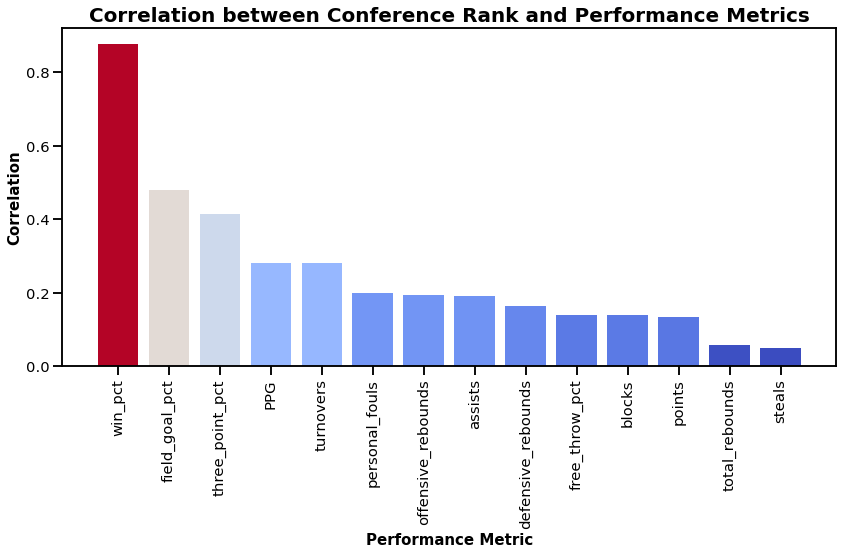

In [14]:
performance_metrics = ['win_pct', 'field_goal_pct', 'three_point_pct', 'free_throw_pct',
                       'offensive_rebounds', 'defensive_rebounds', 'total_rebounds',
                       'assists', 'personal_fouls', 'steals', 'turnovers', 'blocks',
                       'points', 'PPG']

correlation_matrix = team_stats.corr()
conference_rank_correlations = correlation_matrix.loc['conference_rank', performance_metrics]
conference_rank_correlations = conference_rank_correlations.abs().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(conference_rank_correlations.min(), conference_rank_correlations.max())
bars = ax.bar(conference_rank_correlations.index, conference_rank_correlations, color=cmap(norm(conference_rank_correlations)))

ax.set_xlabel('Performance Metric', fontsize=15, fontweight='bold')
ax.set_ylabel('Correlation', fontsize=15, fontweight='bold')
ax.set_title('Correlation between Conference Rank and Performance Metrics', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

As expected `win_pct`, `field_goal_pct` and `three_point_pct` seem to have the strongest correlation with `conference_rank`. It is surprising to see features like `PPG` and `points` have such a low correlation as one would expect them to have the most impact on a team's success (`conference_rank` in this case). 

At the same time it’s important to remember that correlation does not imply causation. Just because a feature is correlated with `conference_rank` does not necessarily mean that it causes a team to win. Other factors not included in our dataset might also play a significant role. However, we will still take the top 5 correlated features and build a Linear Regression model to see if we can somewhat accurately predict `conference_rank` based on them  :

In [51]:
X = team_stats[['win_pct', 'field_goal_pct', 'three_point_pct', 'PPG', 'turnovers']]
y = team_stats['conference_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Absolute Error: 1.344382439772509
Mean Squared Error: 2.937034725051422
R-squared: 0.8418432518256858


Lets see what the above values mean :

   - <ins> Mean Absolute Error (MAE) </ins> : MAE measures the average absolute difference between the predicted conference ranks and the actual conference ranks. In this case, an MAE of approximately 1.34 indicates that, on average, the model's predictions are off by around 1.34 positions in conference rank.

   - <ins> Mean Squared Error (MSE) </ins> : MSE measures the average squared difference between the predicted conference ranks and the actual conference ranks. In this case, the MSE of approximately 2.94 indicates that, on average, the squared difference between predicted and actual conference ranks is around 2.94

   - <ins> R-squared (R²) </ins> : R-squared is a measure of how well the regression model explains the variance in the target variable. In this case, the R-squared value of approximately 0.84 indicates that around 84% of the variance in conference ranks is explained by the independent variables (selected metrics) included in the model.

Overall, the evaluation metrics suggest that the linear regression model performs reasonably well in predicting conference ranks based on the selected features, indicating these performance metrics have a huge impact on a team's success. However, there are still a few limitations to consider :
 
  - Assumptions of Linear Regression: Linear regression assumes a linear relationship between the features and the target variable. While individual player stats like points per game (PPG) or assists may have a linear relationship with team performance to some extent, there are hidden factors to be considered. For e.g : adding a high-scoring player to a team with an already strong scoring might not have a proportional impact on conference rank

  - Correlation vs. Causation: While the model identifies correlations between different metrics and conference ranks, it does not establish causation. Other unobserved variables or confounding factors may influence both the features and the target variable.

  - Limited Features: Sports outcomes can be quite unpredictable and influenced by many factors, some of which may not be easily quantifiable (like player morale, injuries, etc.). So while such a model can provide useful insights, its predictions should not be taken as absolute.

Finally we will look at how individual game factors such as `performance against specific opponents` have an impact on a team's success

Lets first look at how teams tend to do against their opponents and if it actually does affect their performance. We'll split the data into two halves (first table containing data from years `2000-2011` and second from years `2011-2023`) to see how teams have progressed over the two decades against the same opponents :

In [52]:
data_2000_to_2011 = team_game_data[(team_game_data['season'] >= '2000-01') & 
                                    (team_game_data['season'] <= '2010-11')]

data_2011_to_2023 = team_game_data[(team_game_data['season'] >= '2011-12') & 
                                    (team_game_data['season'] <= '2022-23')]

In [53]:
def calculate_team_performance(data):
    team_performance = data.groupby(['team_name', 'opponent_name']).agg({
        'win/loss': lambda x: (x == 'W').sum(),  # Number of wins
        'game_id': 'count',  # Total number of games
        'points': 'mean',  # Average points scored
        'field_goal_pct': 'mean'  # Average field goal percentage
    }).reset_index()
    
    team_performance['losses'] = team_performance['game_id'] - team_performance['win/loss']

    team_performance.rename(columns={'win/loss': 'wins', 'game_id': 'games_played', 'points': 'avg_points_scored',
                                     'field_goal_pct': 'avg_field_goal_pct'}, inplace=True)

    column_order = ['team_name', 'opponent_name','games_played', 'wins', 'losses' , 'avg_points_scored', 'avg_field_goal_pct']
    team_performance = team_performance.reindex(columns=column_order)
    return team_performance

In [54]:
# Calculate team performance for each timeframe
team_performance_2000_to_2011 = calculate_team_performance(data_2000_to_2011)
team_performance_2011_to_2023 = calculate_team_performance(data_2011_to_2023)

In [55]:
team_performance_2000_to_2011

,team_name,opponent_name,games_played,wins,losses,avg_points_scored,avg_field_goal_pct
0,Atlanta Hawks,Boston Celtics,13,5,8,95.846154,0.451538
1,Atlanta Hawks,Brooklyn Nets,15,3,12,94.000000,0.441067
2,Atlanta Hawks,Charlotte Hornets,19,14,5,95.473684,0.466789
3,Atlanta Hawks,Chicago Bulls,11,6,5,98.090909,0.433364
4,Atlanta Hawks,Cleveland Cavaliers,19,8,11,92.578947,0.452368
...,...,...,...,...,...,...,...
868,Washington Wizards,Portland Trail Blazers,9,4,5,88.444444,0.434000
869,Washington Wizards,Sacaramento Kings,6,2,4,97.166667,0.431333
870,Washington Wizards,San Antonio Spurs,11,4,7,91.181818,0.434818
871,Washington Wizards,Toronto Raptors,18,10,8,96.333333,0.444667


In [56]:
team_performance_2011_to_2023

,team_name,opponent_name,games_played,wins,losses,avg_points_scored,avg_field_goal_pct
0,Atlanta Hawks,Boston Celtics,12,5,7,102.666667,0.458750
1,Atlanta Hawks,Brooklyn Nets,16,5,11,108.750000,0.446688
2,Atlanta Hawks,Charlotte Hornets,25,15,10,105.240000,0.458600
3,Atlanta Hawks,Chicago Bulls,16,6,10,100.687500,0.437500
4,Atlanta Hawks,Cleveland Cavaliers,25,14,11,109.320000,0.467040
...,...,...,...,...,...,...,...
865,Washington Wizards,Portland Trail Blazers,5,3,2,105.800000,0.447200
866,Washington Wizards,Sacaramento Kings,9,5,4,111.222222,0.481889
867,Washington Wizards,San Antonio Spurs,10,2,8,101.700000,0.455400
868,Washington Wizards,Toronto Raptors,18,3,15,98.888889,0.430944


To take the number of games into account lets look calculate the win and loss percentage for each row :

In [57]:
team_performance_2000_to_2011['win_pct'] = team_performance_2000_to_2011['wins'] / team_performance_2000_to_2011['games_played']
team_performance_2000_to_2011['loss_pct'] = team_performance_2000_to_2011['losses'] / team_performance_2000_to_2011['games_played']

In [58]:
team_performance_2011_to_2023['win_pct'] = team_performance_2011_to_2023['wins'] / team_performance_2011_to_2023['games_played']
team_performance_2011_to_2023['loss_pct'] = team_performance_2011_to_2023['losses'] / team_performance_2011_to_2023['games_played']

In [59]:
team_performance_2000_to_2011.head(10)

,team_name,opponent_name,games_played,wins,losses,avg_points_scored,avg_field_goal_pct,win_pct,loss_pct
0,Atlanta Hawks,Boston Celtics,13,5,8,95.846154,0.451538,0.384615,0.615385
1,Atlanta Hawks,Brooklyn Nets,15,3,12,94.000000,0.441067,0.200000,0.800000
2,Atlanta Hawks,Charlotte Hornets,19,14,5,95.473684,0.466789,0.736842,0.263158
3,Atlanta Hawks,Chicago Bulls,11,6,5,98.090909,0.433364,0.545455,0.454545
4,Atlanta Hawks,Cleveland Cavaliers,19,8,11,92.578947,0.452368,0.421053,0.578947
5,Atlanta Hawks,Dallas Mavericks,9,3,6,90.222222,0.429222,0.333333,0.666667
6,Atlanta Hawks,Denver Nuggets,9,6,3,107.111111,0.476111,0.666667,0.333333
7,Atlanta Hawks,Detroit Pistons,19,6,13,87.736842,0.444947,0.315789,0.684211
8,Atlanta Hawks,Golden State Warriors,5,2,3,94.400000,0.450000,0.400000,0.600000
9,Atlanta Hawks,Houston Rockets,9,2,7,84.222222,0.402556,0.222222,0.777778


In [60]:
team_performance_2011_to_2023.head(10)

,team_name,opponent_name,games_played,wins,losses,avg_points_scored,avg_field_goal_pct,win_pct,loss_pct
0,Atlanta Hawks,Boston Celtics,12,5,7,102.666667,0.458750,0.416667,0.583333
1,Atlanta Hawks,Brooklyn Nets,16,5,11,108.750000,0.446688,0.312500,0.687500
2,Atlanta Hawks,Charlotte Hornets,25,15,10,105.240000,0.458600,0.600000,0.400000
3,Atlanta Hawks,Chicago Bulls,16,6,10,100.687500,0.437500,0.375000,0.625000
4,Atlanta Hawks,Cleveland Cavaliers,25,14,11,109.320000,0.467040,0.560000,0.440000
5,Atlanta Hawks,Dallas Mavericks,13,9,4,103.307692,0.458308,0.692308,0.307692
6,Atlanta Hawks,Denver Nuggets,11,6,5,106.545455,0.445364,0.545455,0.454545
7,Atlanta Hawks,Detroit Pistons,24,13,11,104.875000,0.458708,0.541667,0.458333
8,Atlanta Hawks,Golden State Warriors,7,1,6,101.714286,0.441571,0.142857,0.857143
9,Atlanta Hawks,Houston Rockets,12,4,8,107.583333,0.472417,0.333333,0.666667


In [61]:
# Plot win percentage of team against each opponent in both timeframes
def plot_team_win_pct(team):
    
    team_2001_to_2010 = team_performance_2000_to_2011[team_performance_2000_to_2011['team_name'] == team]
    team_2011_to_2023 = team_performance_2011_to_2023[team_performance_2011_to_2023['team_name'] == team]

    fig, ax = plt.subplots(figsize=(20, 10))

    ax.plot(team_2001_to_2010['opponent_name'], team_2001_to_2010['win_pct'], label='2000-2011', marker='o')
    ax.plot(team_2011_to_2023['opponent_name'], team_2011_to_2023['win_pct'], label='2011-2023', marker='o')
    ax.set_xlabel('Opponent', fontsize=15, fontweight='bold')
    ax.set_ylabel('Win Percentage', fontsize=15, fontweight='bold')
    ax.set_title(f"{team} Win Percentage Against Each Opponent", fontsize=20, fontweight='bold')
    plt.xticks(rotation=45)
    ax.legend(loc = 'upper left')
    
    fig.tight_layout()
    plt.show()

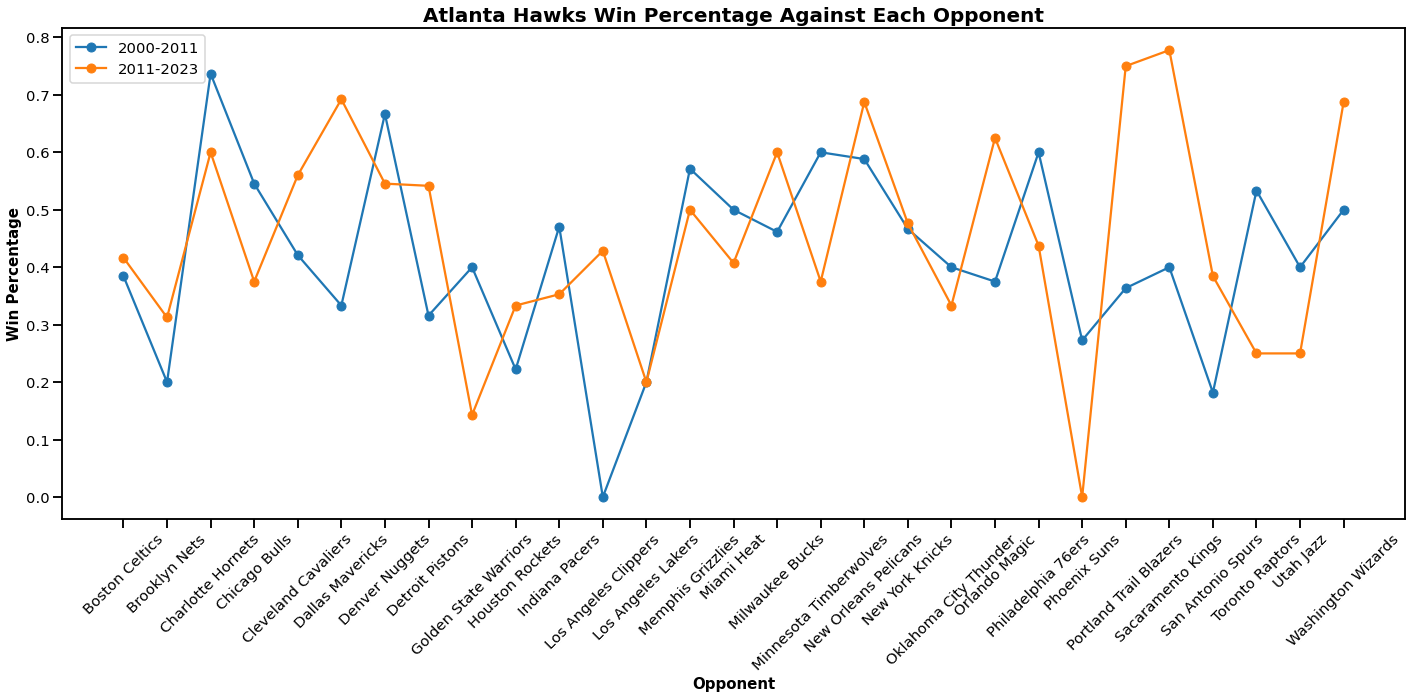

In [62]:
plot_team_win_pct('Atlanta Hawks')

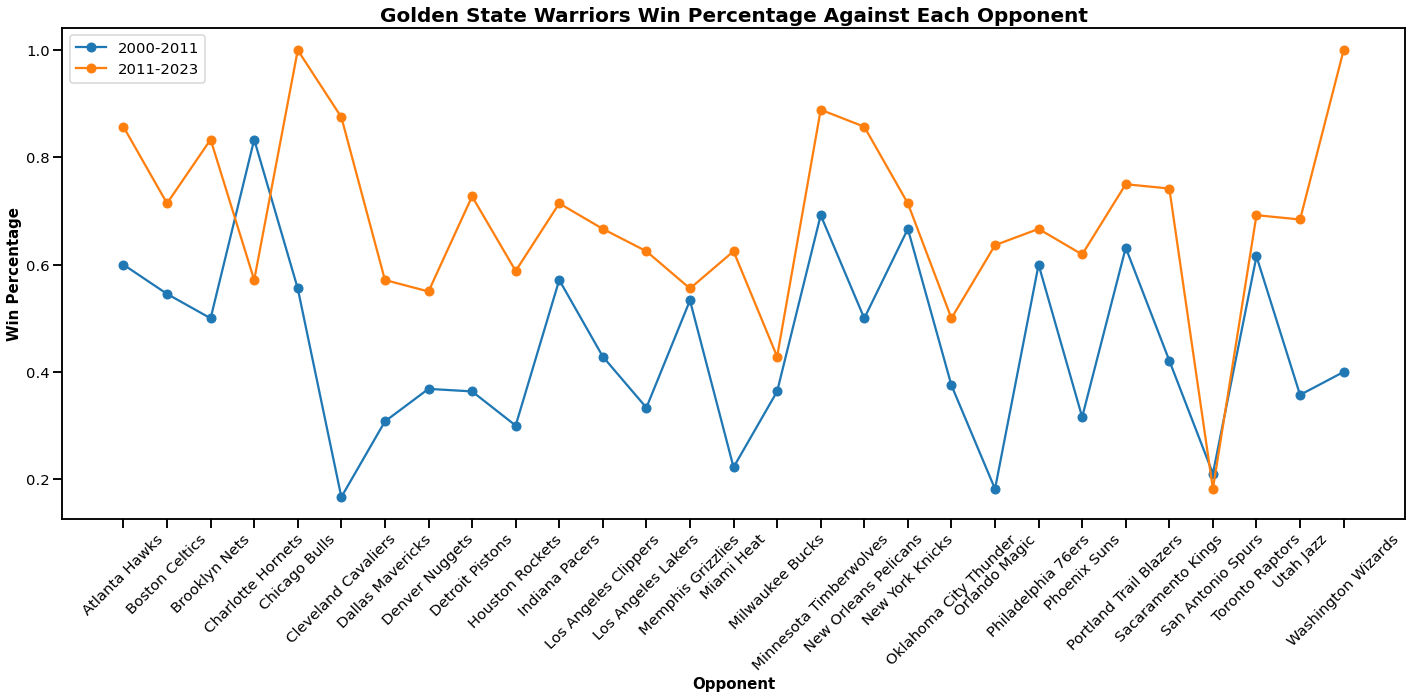

In [63]:
plot_team_win_pct('Golden State Warriors')

In the graphs above, the blue line represents the win% of the team against each opponent from `2000-2011` and the orange line represents the same information from `2011` onwards. From this we can see if the team has improved against their opponents over the years (if `orange point` lies above `blue point`). 

The `Atlanta Hawks` seem to have improved against some of their opponents, especially  `Indiana Pacers` (win% went from 0 to 40%) and `Portland Trail Blazers` (40% to 80%) which suggests they certainly have upped their game.

On the other side, by the looks of it `Golden State warriors` have improved against almost all of their opponents which goes to show how dominant they have been in the past few years (they have won the championship 3 times in the last 5 years)

Therefore, it appears that the way teams perform against specific opponents can indeed be an important factor affecting a team's overall performance. The examples  provided above with the Atlanta Hawks and the Golden State Warriors illustrate this point well. Analyzing performance against specific opponents allows teams to identify strengths and weaknesses more accurately, leading to targeted improvements in gameplay, strategies, and player development. It emphasizes the importance of understanding matchups, exploiting opponent weaknesses, and adapting strategies based on the strengths and weaknesses of specific teams

Lastly, before concluding our analysis, it will be interesting to see if teams have improved overall by calculating the average of the difference in win_pct against each opponent (win_pct in `"2011-2023"` minus win_pct in `"2000-2010"`) which will give us the average improvement in win_pct for each team :

In [64]:
team_performance_2011_to_2023['overall_win_pct'] = team_performance_2011_to_2023['win_pct'] - team_performance_2000_to_2011['win_pct']

In [65]:
team_performance_2011_to_2023.head(10)

,team_name,opponent_name,games_played,wins,losses,avg_points_scored,avg_field_goal_pct,win_pct,loss_pct,overall_win_pct
0,Atlanta Hawks,Boston Celtics,12,5,7,102.666667,0.458750,0.416667,0.583333,0.032051
1,Atlanta Hawks,Brooklyn Nets,16,5,11,108.750000,0.446688,0.312500,0.687500,0.112500
2,Atlanta Hawks,Charlotte Hornets,25,15,10,105.240000,0.458600,0.600000,0.400000,-0.136842
3,Atlanta Hawks,Chicago Bulls,16,6,10,100.687500,0.437500,0.375000,0.625000,-0.170455
4,Atlanta Hawks,Cleveland Cavaliers,25,14,11,109.320000,0.467040,0.560000,0.440000,0.138947
5,Atlanta Hawks,Dallas Mavericks,13,9,4,103.307692,0.458308,0.692308,0.307692,0.358974
6,Atlanta Hawks,Denver Nuggets,11,6,5,106.545455,0.445364,0.545455,0.454545,-0.121212
7,Atlanta Hawks,Detroit Pistons,24,13,11,104.875000,0.458708,0.541667,0.458333,0.225877
8,Atlanta Hawks,Golden State Warriors,7,1,6,101.714286,0.441571,0.142857,0.857143,-0.257143
9,Atlanta Hawks,Houston Rockets,12,4,8,107.583333,0.472417,0.333333,0.666667,0.111111


In [66]:
overall_improvement = team_performance_2011_to_2023.groupby('team_name')['overall_win_pct'].mean()

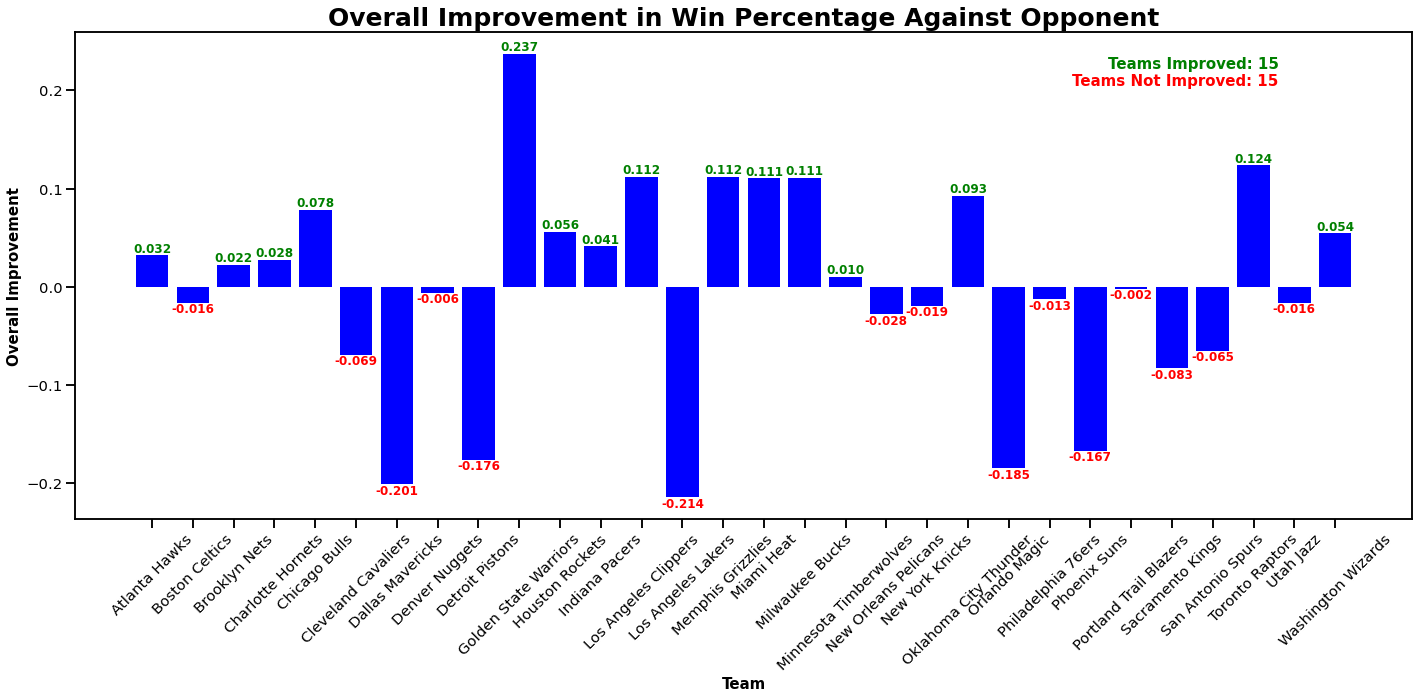

In [67]:
fig, ax = plt.subplots(figsize=(20, 10))

bars = ax.bar(overall_improvement.index, overall_improvement, color='blue')
ax.set_xlabel('Team', fontsize=15, fontweight='bold')
ax.set_ylabel('Overall Improvement', fontsize=15, fontweight='bold')
ax.set_title("Overall Improvement in Win Percentage Against Opponent", fontsize=25, fontweight='bold')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top' 
    color = 'green' if height >= 0 else 'red' 
    ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.3f}'.format(height),
            ha='center', va=va, fontsize=12, fontweight='bold', color=color)

num_improved = (overall_improvement > 0).sum()
num_not_improved = (overall_improvement <= 0).sum()

ax.text(0.9, 0.95, f'Teams Improved: {num_improved}',transform=ax.transAxes, ha='right', va='top', fontsize=15, fontweight = 'bold', color = 'green')
ax.text(0.9, 0.95, f'\nTeams Not Improved: {num_not_improved}',transform=ax.transAxes, ha='right', va='top', fontsize=15, fontweight = 'bold', color = 'red')
    
fig.tight_layout()
plt.show()

# Conclusion 

From our analysis, we can conclude Team success in sports is intricately tied to star player performance, team metrics, and performance against specific opponents. Star players often elevate team performance with their exceptional skills and leadership. Monitoring key metrics like win percentage and points scored provides insights into overall team effectiveness and areas for improvement. Additionally, analyzing performance against specific opponents reveals a team's adaptability and strategic expertise, offering opportunities to capitalize on strengths and exploit weaknesses. By excelling in these areas, teams can optimize their chances for success and achieve their competitive goals.


However, while these factors certainly do  influence a team's success, there are additional elements that may impact outcomes but couldnt be explored as part of our analysis as they are beyond the scope of this project. For e.g. : Factors such as team chemistry, coaching strategies, player injuries, and off-court dynamics can significantly influence a team's performance and success but may not be fully captured by traditional metrics or analysis.